<a href="https://colab.research.google.com/github/HiagoAD/GDI2/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import numpy as np
import pandas as pd


## **Datasets**


In [356]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb.csv", encoding ="UTF-8")


## **Detalhamento de datasets**


In [271]:
pd.to_datetime("2020-07-08T00:00:00")

Timestamp('2020-07-08 00:00:00')

In [ ]:
emlurb.head()

In [ ]:
dengue.head()

## **Reorganização de Datasets e merge**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])
dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [380]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.size

25020

In [381]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().sort_values(ascending=False).reset_index(name="CHAMADOS_EMLURB")
emlurb_data.size
# emlurb_data.head()


14889

Agora que temos duas tabelas, **dengue_data**, com informação dos casos de dengue em um bairro por dia, e **emlurb_data**, com informação dos pedidos de drenagem solicitados pela população em cada bairro por dia, faremos o merge das duas tabelas para unificar todos esses dados.


In [365]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.size

1506

Com a tabela **crossed_info**, conseguimos reunir o número de casos de dengue e o número de chamados de drenagem, por dia, em um determinado bairro de Recife.

In [260]:
from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-2.049378462269129, pvalue=0.04146883067279564)



Aparentemente, não há forte correlação diária entre os pedidos de drenagem e os casos de dengue, mas há indícios de. 



Próximos passos
  * Analizar chamados não atendidos

## Estudo de gráficos (cenário 1)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

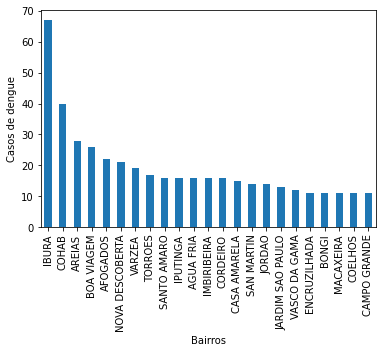

In [261]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

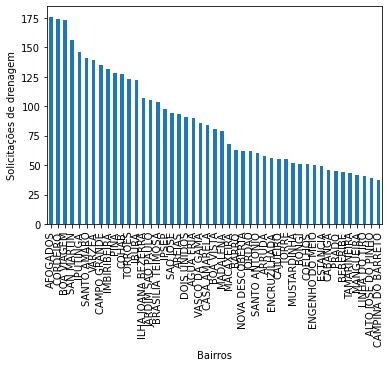

In [263]:
# Análise para Solicitações de drenagem x Bairros (para mais de 35 chamados)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações de drenagem', xlabel='Bairros')

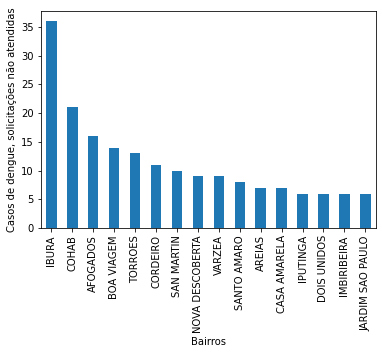

In [251]:
# Análise para Casos de dengue com solicitações de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')

# **Análise de chamados de drenagem não atendidos pela EMLURB x Casos de Dengue**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]

servicos = ["DRENAGEM"]
emlurb_data = emlurb_data[emlurb_data.GRUPOSERVICO_DESCRICAO.isin(servicos)]
emlurb_data = emlurb_data[(emlurb_data.SITUACAO != "ATENDIDA")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.head()

In [185]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFLITOS,2020-01-15,1
1,AFLITOS,2020-03-03,1
2,AFLITOS,2020-03-04,1
3,AFLITOS,2020-04-17,1
4,AFLITOS,2020-05-07,1


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

In [187]:
crossed_info.size

1374

In [188]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-0.8150945908464697, pvalue=0.4158687761557307)

Há **forte** correlação entre casos diários de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.

Próximos passos:
  * Analizar novamente casos gerais, porém na escala de um mês em vez de diária

## Estudo de gráficos (cenário 2)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

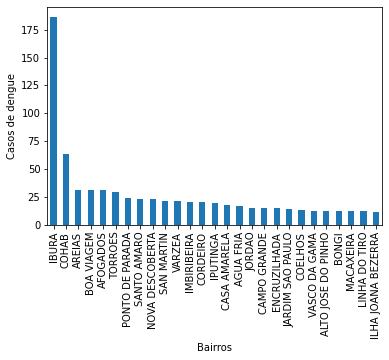

In [162]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

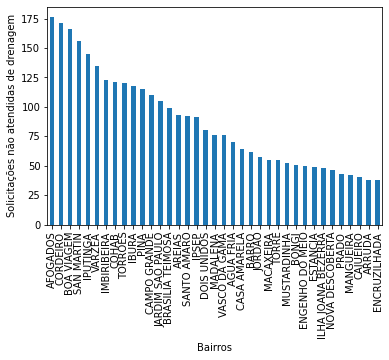

In [137]:
# Análise para Solicitações não atendidas de drenagem x Bairros (para mais de 35 chamados não atendidos)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações não atendidas de drenagem', xlabel='Bairros')

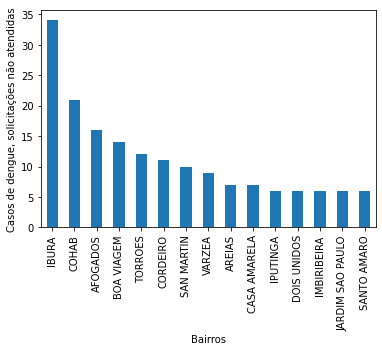

In [139]:
# Análise para Casos de dengue com solicitações não atendidas de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')

# **Análise de chamados de drenagem  x Casos de Dengue (Mensal)**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data.head()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue["dt_notificacao"], infer_datetime_format=True)

dengue_data=dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M"), "no_bairro_residencia"]).size().reset_index(name="CASOS_DENGUE")
dengue_data.describe()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"], infer_datetime_format=True)

emlurb_data.describe()

In [398]:
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M"), "BAIRRO"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()

,DATA_DEMANDA,BAIRRO,CHAMADOS_EMLURB
0,2020-01-31,AFLITOS,1
1,2020-01-31,AFOGADOS,1
2,2020-01-31,AGUA FRIA,1
3,2020-01-31,ALTO DO MANDU,1
4,2020-01-31,ALTO JOSE BONIFACIO,1


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

In [ ]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Há **fraca** correlação entre casos mensais de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.


## Estudo de gráficos (cenário 3)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

IndexError: ignored

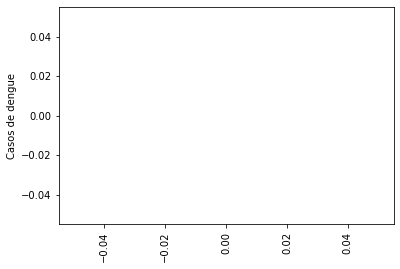

In [397]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')